<a href="https://colab.research.google.com/github/Pablocodes1993/finalproject/blob/main/RFM_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY IMPORTATION

In [240]:
#Library Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from datetime import timedelta
from sklearn.impute import KNNImputer

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style



import math
from statistics import median
from scipy.stats import skew
import weightedstats as ws
from statsmodels.stats.stattools import medcouple


%matplotlib inline

# CLEANED DATASET IMPORTATION

In [82]:
# CLEANED DATASET WITH MISSING VALUE IMPUTATION
olist_df1= 'https://drive.google.com/file/d/1Lyj38pGQdtOhtF0azUnA6fL1NycUqNak/view?usp=share_link'
olist_df1 = 'https://drive.google.com/uc?export=download&id='+olist_df1.split('/')[-2]
olist_df1= pd.read_csv(olist_df1)

# CLEANED DATASET DROPPING ALL THE MISSING VALUES
olist_df2= 'https://drive.google.com/file/d/1piGjUdrfnATRIT9dJ_C2nglnd2qXApuY/view?usp=share_link'
olist_df2 = 'https://drive.google.com/uc?export=download&id='+olist_df2.split('/')[-2]
olist_df2= pd.read_csv(olist_df2)

# RFM ANALYSIS

In [83]:


# Convert 'order_purchase_timestamp' to datetime type
olist_df2['order_purchase_timestamp'] = pd.to_datetime(olist_df2['order_purchase_timestamp'])

# Set the date for analysis
current_date = olist_df2['order_purchase_timestamp'].max() + pd.DateOffset(days=1)
print(current_date)


2018-08-30 15:00:37


In [84]:
#Recency calculation df
sorted_recency_df = olist_df2.sort_values('order_purchase_timestamp', ascending=False)
recency_df = sorted_recency_df.loc[:, ['order_purchase_timestamp', 'customer_unique_id']]
recency_df = olist_df2.groupby('customer_unique_id').apply(lambda x: pd.Series({
   'order_purchase_timestamp': x['order_purchase_timestamp'].max(), 
    'Recency': (current_date - x['order_purchase_timestamp'].max()).days
    
})).reset_index()

#Sort the recency column
#recency_df  = recency_df.sort_values('Recency', ascending=False)


recency_df




,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288
...,...,...,...
91454,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447
91455,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262
91456,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568
91457,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119


In [85]:
#Frequency calculation df
#frequency_df = pd.DataFrame( olist_df2.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
#frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
#frequency_df

frequency_df=olist_df2.groupby('customer_unique_id')['product_id'].size().reset_index(name='Frequency')
#Sort the recency column
frequency_df  = frequency_df.sort_values('Frequency', ascending=False)

frequency_df

,customer_unique_id,Frequency
55227,9a736b248f67d166d2fbb006bcb877c3,75
39998,6fbc7cdadbb522125f4b27ae9dee4060,38
89266,f9ae226291893fda10af7965268fb7f6,35
31030,569aa12b73b5f7edeaa6f2a01603e381,26
77795,d97b3cfb22b0d6b25ac9ed4e9c2d481b,24
...,...,...
32866,5b96a6a7d5de5738179accb10c9af8aa,1
32865,5b9603bf6b5ba113060bd41f770c725e,1
32864,5b95dc419c1284aef08693d3ea32da8d,1
32861,5b93d204e1d3130dd6ede5da588c0bcb,1


In [86]:
#Monetary Calculation df
monetary_df=olist_df2.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='Monetary')
#Sort the recency column
monetary_df  = monetary_df.sort_values('Monetary', ascending=False)

monetary_df


,customer_unique_id,Monetary
3656,0a0a92112bd4c708ca5fde585afaa872,109312.64
70133,c402f431464c72e27330a67f7b94d4fb,44048.00
22940,4007669dec559734d6f53e029e360987,36489.24
85685,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00
42292,763c8b1c9c68a0229c42c9fc6f662b93,29099.52
...,...,...
39873,6f5b9d1cdccc4d28f0483a612edecacf,11.63
14509,2878e5b88167faab17d4fb83a986d38b,11.63
64151,b33336f46234b24a613ad9064d13106d,10.89
67646,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07


In [87]:
monetary_df.count()

customer_unique_id    91459
Monetary              91459
dtype: int64

In [88]:
#Datasets merging process with key variables
RFM_df= pd.merge(recency_df, frequency_df, on="customer_unique_id", how='inner')
RFM_df= RFM_df.merge(monetary_df, on="customer_unique_id", how='inner')
RFM_df.describe()



,Recency,Frequency,Monetary
count,91459.000000,91459.000000,91459.000000
mean,237.069769,1.237560,212.316635
std,152.546629,0.844406,631.329419
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.850000
50%,218.000000,1.000000,112.840000
75%,345.000000,1.000000,202.760000
max,695.000000,75.000000,109312.640000


In [89]:
quantiles = RFM_df.quantile(q=[0.20,0.40,0.6,0.8])
quantiles

<ipython-input-89-6be447f750db>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM_df.quantile(q=[0.20,0.40,0.6,0.8])


,Recency,Frequency,Monetary
0.2,91.0,1.0,56.01
0.4,176.0,1.0,89.67
0.6,268.0,1.0,139.98
0.8,381.0,1.0,238.32


In [90]:
# Compute quantiles for each feature
quantiles = RFM_df.quantile(q=[0.2, 0.4, 0.6, 0.8])

# Assign quartile labels for each feature using apply() method
RFM_Segment = RFM_df.copy()
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(lambda x: sum(x <= quantiles['Recency'].values) + 1)
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(lambda x: sum(x <= quantiles['Frequency'].values) + 1)
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(lambda x: sum(x <= quantiles['Monetary'].values) + 1)

# Concatenate the quartile labels to form the RFMClass label
RFM_Segment['RFMClass'] = RFM_Segment['R_Quartile'].map(str) \
                            + RFM_Segment['F_Quartile'].map(str) \
                            + RFM_Segment['M_Quartile'].map(str)


<ipython-input-90-4b6048315392>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM_df.quantile(q=[0.2, 0.4, 0.6, 0.8])


In [91]:
RFM_df['customer_unique_id'].nunique()



91459

In [92]:
RFM_df.describe()

,Recency,Frequency,Monetary
count,91459.000000,91459.000000,91459.000000
mean,237.069769,1.237560,212.316635
std,152.546629,0.844406,631.329419
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.850000
50%,218.000000,1.000000,112.840000
75%,345.000000,1.000000,202.760000
max,695.000000,75.000000,109312.640000


In [93]:
RFM_Segment

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90,4,5,2,452
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115,1,27.19,4,5,5,455
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537,1,86.22,1,5,4,154
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321,1,43.62,2,5,5,255
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288,1,196.89,2,5,2,252
...,...,...,...,...,...,...,...,...,...
91454,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447,2,4134.84,1,1,1,111
91455,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262,1,84.58,3,5,4,354
91456,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568,1,112.46,1,5,3,153
91457,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119,1,133.69,4,5,3,453


In [94]:
RFM_Segment['RFMClass'].value_counts()

355    3759
254    3698
155    3651
154    3558
555    3538
353    3462
553    3457
455    3452
453    3446
354    3432
554    3410
454    3366
552    3323
255    3316
253    3295
153    3246
452    3180
352    3123
152    3017
252    2890
251    2079
451    2061
151    2032
551    2031
351    1903
211    1730
411    1690
311    1657
511    1612
111    1494
112     573
312     557
412     556
512     540
212     518
113     320
213     291
413     264
313     263
513     262
114     192
214     181
414     163
314     151
115     148
514     140
215     123
315     112
415     105
515      92
Name: RFMClass, dtype: int64

Descriptive statistics for Recency:
count    91459.000000
mean       237.069769
std        152.546629
min          1.000000
25%        114.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency, dtype: float64

Skewness value for Recency:
0.45

Descriptive statistics for Frequency:
count    91459.000000
mean         1.237560
std          0.844406
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequency, dtype: float64

Skewness value for Frequency:
15.91

Descriptive statistics for Monetary:
count     91459.000000
mean        212.316635
std         631.329419
min           9.590000
25%          63.850000
50%         112.840000
75%         202.760000
max      109312.640000
Name: Monetary, dtype: float64

Skewness value for Monetary:
71.64



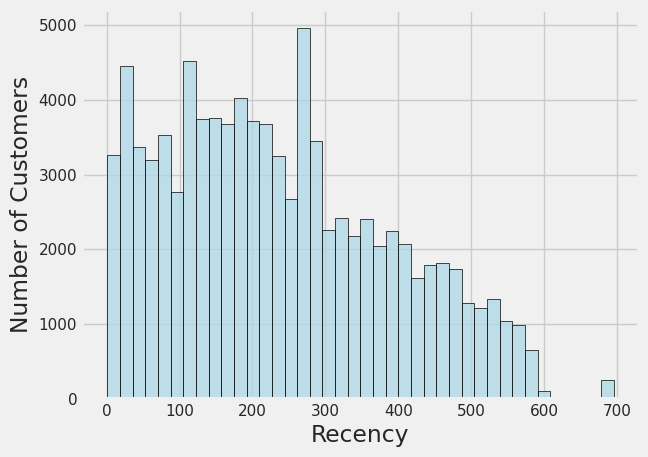

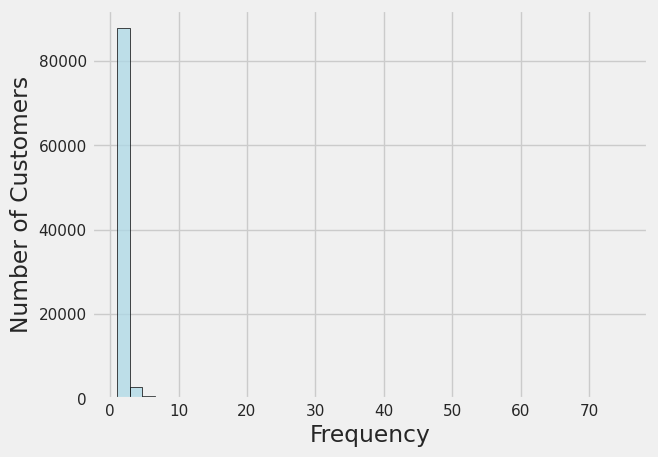

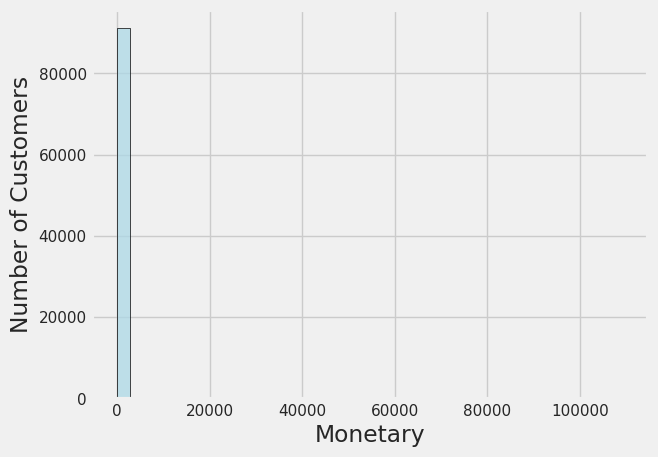

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have an RFM DataFrame named 'RFM_df' with columns 'Recency', 'Frequency', 'Monetary'
# Replace 'RFM_df' with your actual DataFrame containing RFM data
rfm_data = RFM_df

# Perform univariate analysis for each RFM metric
for metric in ['Recency', 'Frequency', 'Monetary']:
    # Calculate descriptive statistics
    statistics = rfm_data[metric].describe()
    print(f"Descriptive statistics for {metric}:\n{statistics}\n")
    
    # Create a histogram with distribution line
    plt.figure()
    sns.histplot(data=rfm_data, x=metric, bins=40, color='lightblue', edgecolor='black')
    plt.xlabel(metric)
    plt.ylabel('Number of Customers')
    plt.grid(True)  # Add grid
    
    # Calculate skewness
    skewness = np.round(rfm_data[metric].skew(), 2)
    print(f"Skewness value for {metric}:\n{skewness}\n")
    
   


Descriptive statistics for Recency:
count    91459.000000
mean       237.069769
std        152.546629
min          1.000000
25%        114.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency, dtype: float64

Skewness value for Recency:
0.45

Descriptive statistics for Frequency:
count    91459.000000
mean         1.237560
std          0.844406
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequency, dtype: float64

Skewness value for Frequency:
15.91

Descriptive statistics for Monetary:
count     91459.000000
mean        212.316635
std         631.329419
min           9.590000
25%          63.850000
50%         112.840000
75%         202.760000
max      109312.640000
Name: Monetary, dtype: float64

Skewness value for Monetary:
71.64



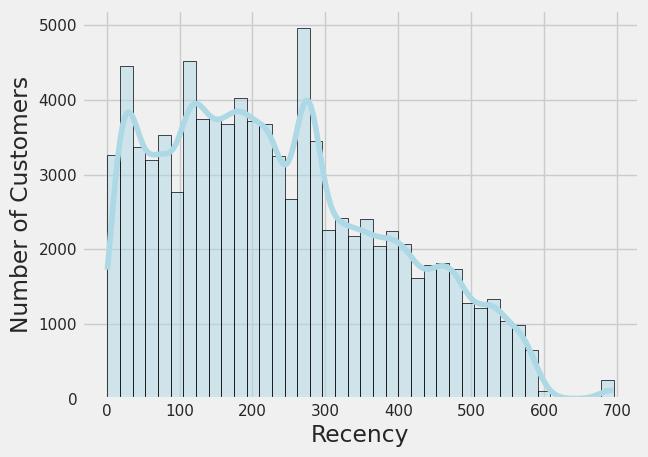

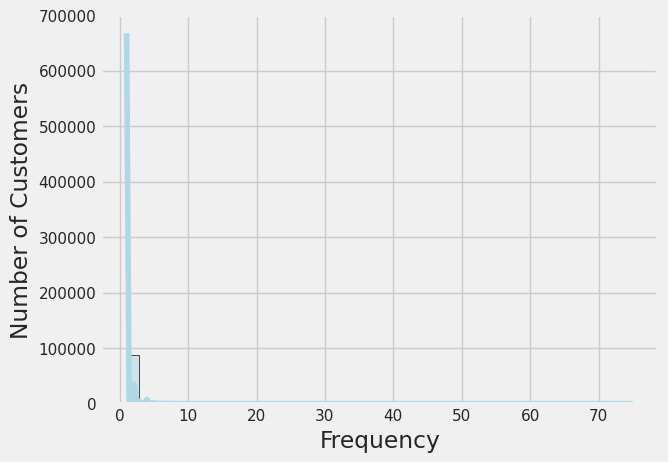

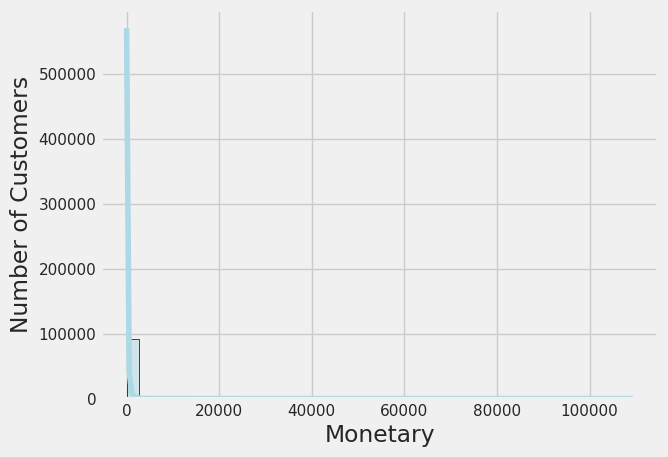

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have an RFM DataFrame named 'RFM_df' with columns 'Recency', 'Frequency', 'Monetary'
# Replace 'RFM_df' with your actual DataFrame containing RFM data
rfm_data = RFM_df

# Perform univariate analysis for each RFM metric
for metric in ['Recency', 'Frequency', 'Monetary']:
    # Calculate descriptive statistics
    statistics = rfm_data[metric].describe()
    print(f"Descriptive statistics for {metric}:\n{statistics}\n")
    
    # Create a histogram with distribution line
    plt.figure()
    sns.histplot(data=rfm_data, x=metric, bins=40, color='lightblue', edgecolor='black', kde=True)
    plt.xlabel(metric)
    plt.ylabel('Number of Customers')
    plt.grid(True)  # Add grid
    
    # Calculate skewness
    skewness = np.round(rfm_data[metric].skew(), 2)
    print(f"Skewness value for {metric}:\n{skewness}\n")


<ipython-input-97-86eaf08a2804>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
<ipython-input-97-86eaf08a2804>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
<ipython-input-97-86eaf08a2804>:4: UserWarning: 



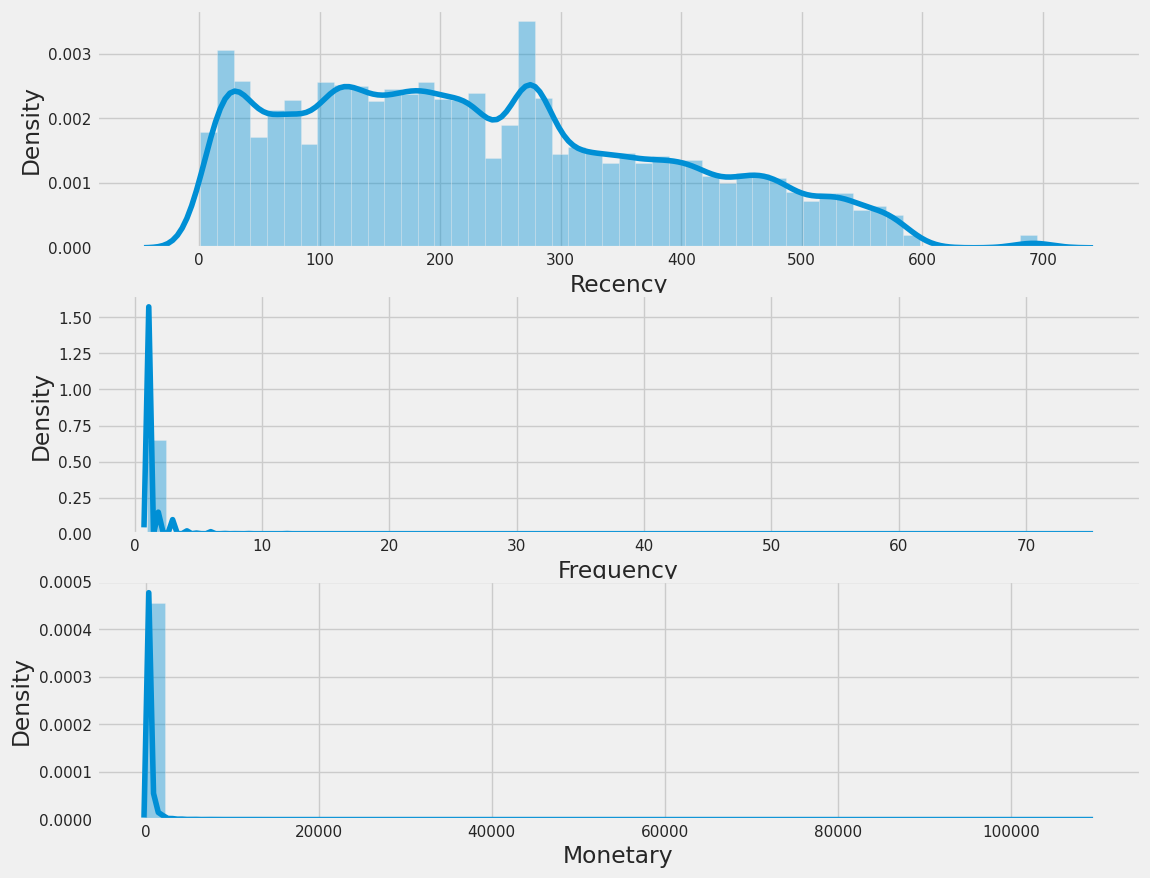

In [97]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

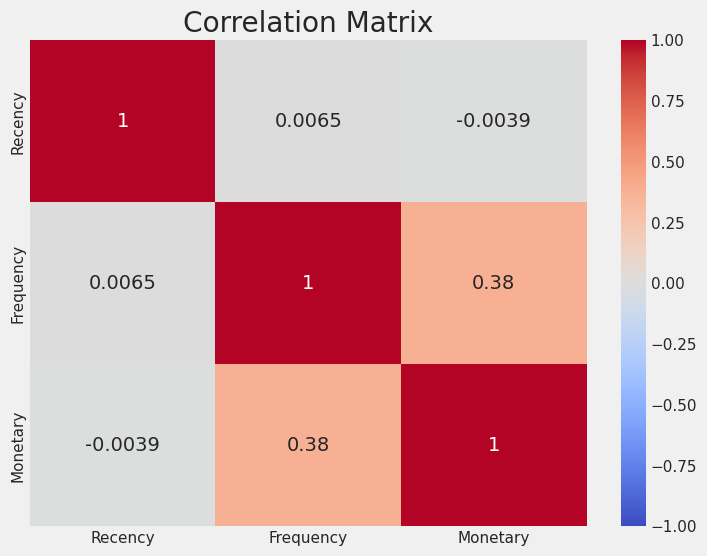

In [98]:
correlation_matrix = RFM_df[['Recency', 'Frequency', 'Monetary']].corr()


# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

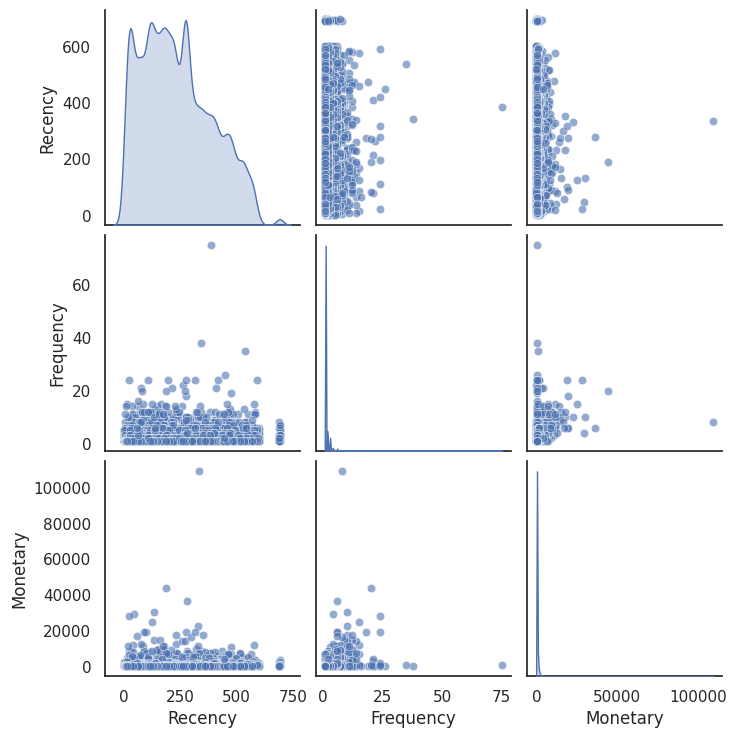

In [99]:

# Assuming you have an RFM DataFrame named 'RFM_df' with columns 'Recency', 'Frequency', 'Monetary'
# Replace 'RFM_df' with your actual DataFrame containing RFM data

# Calculate the correlation matrix
correlation_matrix = RFM_df[['Recency', 'Frequency', 'Monetary']].corr()

# Plot the correlogram
sns.set(style='white')
sns.pairplot(RFM_df[['Recency', 'Frequency', 'Monetary']], diag_kind='kde', plot_kws={'alpha': 0.6})

plt.show()


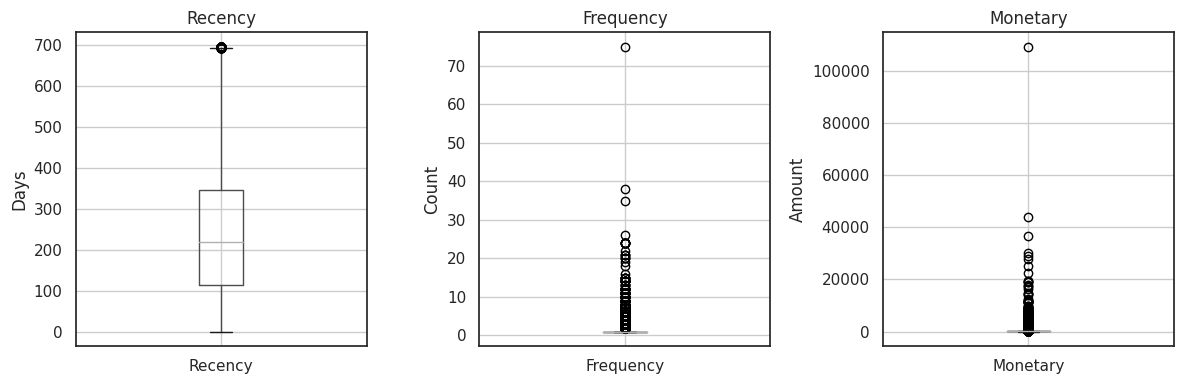

In [100]:
# with columns 'Recency', 'Frequency', and 'MonetaryValue'

# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot box plots for each variable
RFM_df.boxplot(column='Recency', ax=axes[0])
axes[0].set_title('Recency')
axes[0].set_ylabel('Days')

rfm_data.boxplot(column='Frequency', ax=axes[1])
axes[1].set_title('Frequency')
axes[1].set_ylabel('Count')

rfm_data.boxplot(column='Monetary', ax=axes[2])
axes[2].set_title('Monetary')
axes[2].set_ylabel('Amount')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()



In [101]:
from scipy.stats import shapiro

# Assuming you have the RFM data in a pandas DataFrame called 'rfm_data'
# with a column 'Recency'

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(rfm_data['Recency'])

# Print the test results
print('Shapiro-Wilk Test - Recency')
print('Test Statistic:', statistic)
print('p-value:', p_value)

# Interpret the test results
alpha = 0.05  # Set the significance level
if p_value > alpha:
    print('The Recency variable follows a normal distribution.')
else:
    print('The Recency variable does not follow a normal distribution.')


Shapiro-Wilk Test - Recency
Test Statistic: 0.9610154032707214
p-value: 0.0
The Recency variable does not follow a normal distribution.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [102]:
RFM_df

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,115,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288,1,196.89
...,...,...,...,...,...
91454,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447,2,4134.84
91455,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262,1,84.58
91456,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568,1,112.46
91457,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,119,1,133.69


In [103]:
import pandas as pd

# Assuming you have an RFM DataFrame with columns 'customer_id', 'recency', 'frequency', 'monetary', and 'order_date'
rfm_df = RFM_df

# Convert 'order_date' column to datetime type
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

# Calculate the reference date for analysis
reference_date = rfm_df['order_purchase_timestamp'].max()

# Calculate recency, frequency, and monetary values relative to the reference date
rfm_df['Recency'] = (reference_date - rfm_df['order_purchase_timestamp']).dt.days
rfm_df['Frequency'] = rfm_df['Frequency']
rfm_df['Monetary'] = rfm_df['Monetary']

# Perform RFM analysis over time
rfm_over_time = rfm_df.groupby('order_purchase_timestamp').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(rfm_over_time)


      order_purchase_timestamp  Recency  Frequency  Monetary
0          2016-10-03 16:56:50    694.0        1.0     39.09
1          2016-10-03 21:13:36    694.0        1.0     53.73
2          2016-10-03 22:06:03    694.0        1.0    133.46
3          2016-10-03 22:31:31    694.0        1.0     40.95
4          2016-10-03 22:44:10    694.0        1.0    154.57
...                        ...      ...        ...       ...
91222      2018-08-29 12:25:59      0.0        1.0     73.10
91223      2018-08-29 14:18:23      0.0        2.0   1021.92
91224      2018-08-29 14:18:28      0.0        1.0     61.29
91225      2018-08-29 14:52:00      0.0        1.0     33.23
91226      2018-08-29 15:00:37      0.0        1.0     93.75

[91227 rows x 4 columns]


In [104]:
RFM_df

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,287,1,196.89
...,...,...,...,...,...
91454,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,446,2,4134.84
91455,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,261,1,84.58
91456,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,567,1,112.46
91457,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,118,1,133.69


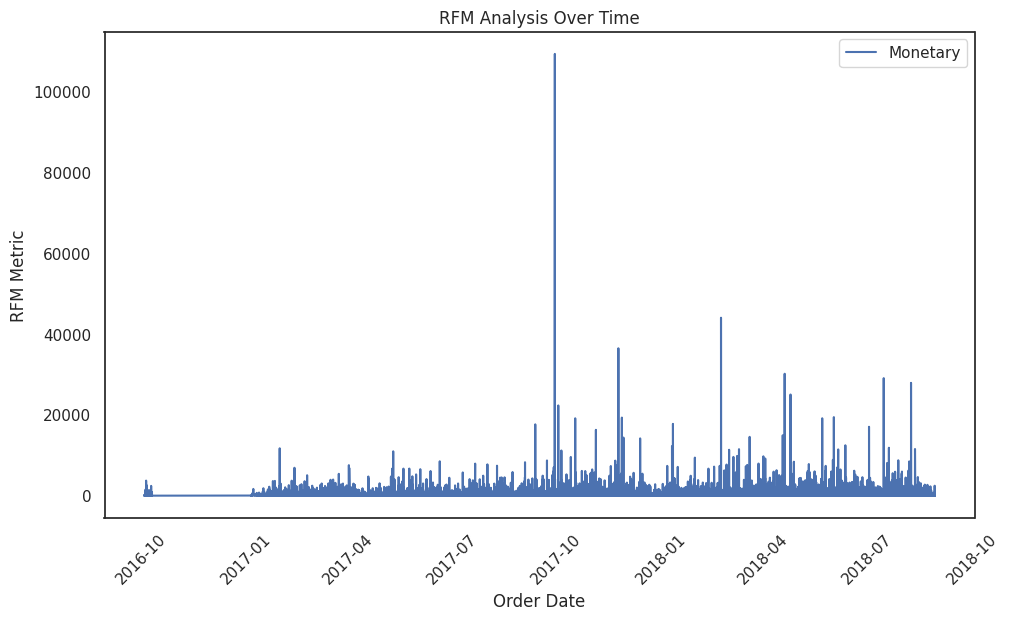

In [105]:
# Assuming you have the rfm_over_time DataFrame containing the average RFM metrics over time

# Convert 'order_date' column to datetime type (if not already done)
rfm_over_time['order_purchase_timestamp'] = pd.to_datetime(rfm_over_time['order_purchase_timestamp'])

# Plotting the results
plt.figure(figsize=(10, 6))
#plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Recency'], label='Recency')
#plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Frequency'], label='Frequency')
plt.plot(rfm_over_time['order_purchase_timestamp'], rfm_over_time['Monetary'], label='Monetary')
plt.xlabel('Order Date')
plt.ylabel('RFM Metric')
plt.title('RFM Analysis Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [106]:
# Select specific columns and store them in another DataFrame
selected_columns_rfm = RFM_df[['Recency','Frequency','Monetary']]
selected_columns_rfm.describe()

,Recency,Frequency,Monetary
count,91459.000000,91459.000000,91459.000000
mean,236.069769,1.237560,212.316635
std,152.546629,0.844406,631.329419
min,0.000000,1.000000,9.590000
25%,113.000000,1.000000,63.850000
50%,217.000000,1.000000,112.840000
75%,344.000000,1.000000,202.760000
max,694.000000,75.000000,109312.640000


# LOG TRANSFORMATION

In [107]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)
    

In [108]:
def erase_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    
    outliers_df = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    df_in = df_in.drop(outliers_df.index)
    
    print("Number of outliers in {} column: {}".format(col_name, len(outliers_df)))
    print("Indexes:", outliers_df.index)
    
    return df_in

In [109]:
RFM_log_trans=selected_columns_rfm.copy()
#RFM_log_trans['Recency'] = np.log10(RFM_log_trans['Recency'])
#RFM_log_trans['Frequency'] = np.log10(RFM_log_trans['Frequency'])
RFM_log_trans['Monetary'] = np.log10(RFM_log_trans['Monetary'])


In [110]:
for i in ["Monetary"]:
    num_outlier(RFM_df, i)
    print("*"*40)

Number of outliers in Monetary column:  8939
Indexes:  Int64Index([    7,    18,    22,    25,    52,    56,    58,    70,    74,
               77,
            ...
            91341, 91368, 91370, 91414, 91425, 91427, 91433, 91448, 91450,
            91454],
           dtype='int64', length=8939)
****************************************


In [111]:
for i in ["Monetary"]:
    num_outlier(RFM_log_trans, i)
    print("*"*40)

Number of outliers in Monetary column:  1805
Indexes:  Int64Index([   22,   128,   197,   220,   225,   254,   255,   286,   411,
              432,
            ...
            91120, 91144, 91192, 91236, 91257, 91287, 91307, 91368, 91448,
            91454],
           dtype='int64', length=1805)
****************************************


In [112]:
for i in ["Monetary"]:
    RFM_log_trans_wo=erase_outliers(RFM_log_trans, i)
    print("*"*40)

Number of outliers in Monetary column: 1805
Indexes: Int64Index([   22,   128,   197,   220,   225,   254,   255,   286,   411,
              432,
            ...
            91120, 91144, 91192, 91236, 91257, 91287, 91307, 91368, 91448,
            91454],
           dtype='int64', length=1805)
****************************************


<ipython-input-113-4449e4b56edf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM_log_trans_wo['Recency'])
<ipython-input-113-4449e4b56edf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM_log_trans_wo['Frequency'])
<ipython-input-113-4449e4b56

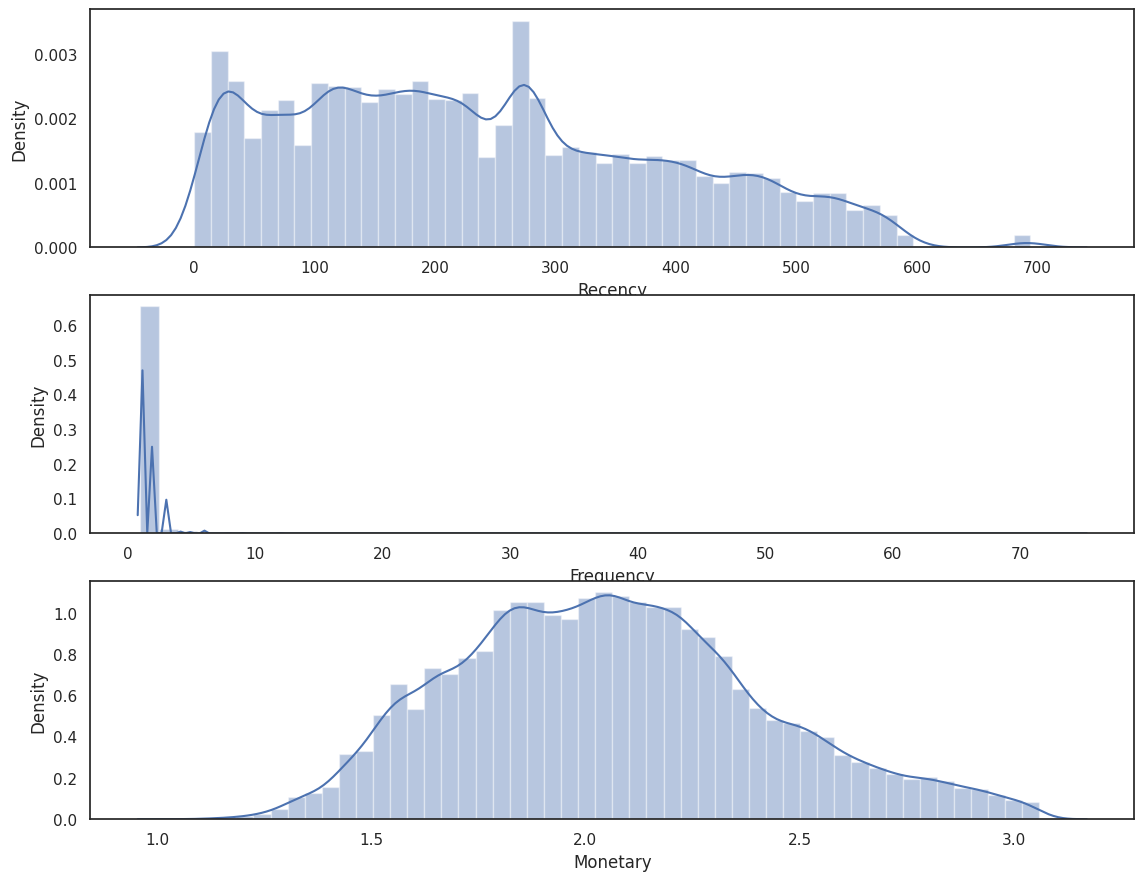

In [113]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_log_trans_wo['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_log_trans_wo['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_log_trans_wo['Monetary'])
plt.show()

In [114]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(RFM_log_trans_wo[['Recency', 'Frequency', 'Monetary']])

# Create a new DataFrame with scaled columns
RFM_log_trans_wo_scaled = pd.DataFrame(X_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])


K MEANS CLUSTERING

In [115]:


def elbow_method(data, k_values):
    wcss = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values against k values
    plt.plot(k_values, wcss, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method for K-means Clustering')
    plt.show()


In [116]:


def perform_rfm_analysis(X):
    range_n_clusters = [2, 3, 4, 5, 6]
    silhouette_avg_n_clusters = []

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

        silhouette_avg_n_clusters.append(silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

    style.use("fivethirtyeight")
    plt.plot(range_n_clusters, silhouette_avg_n_clusters)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.29935889663138787


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

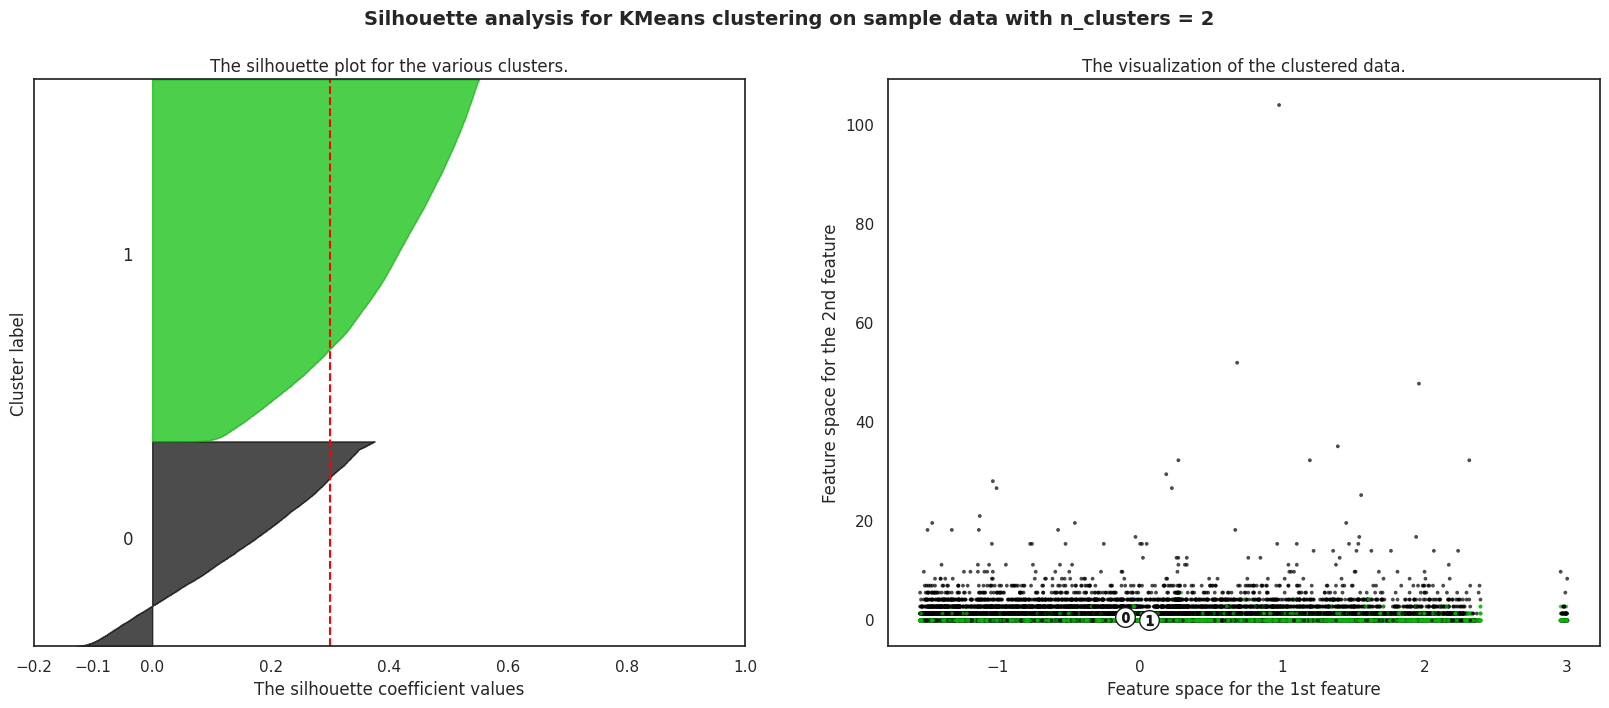

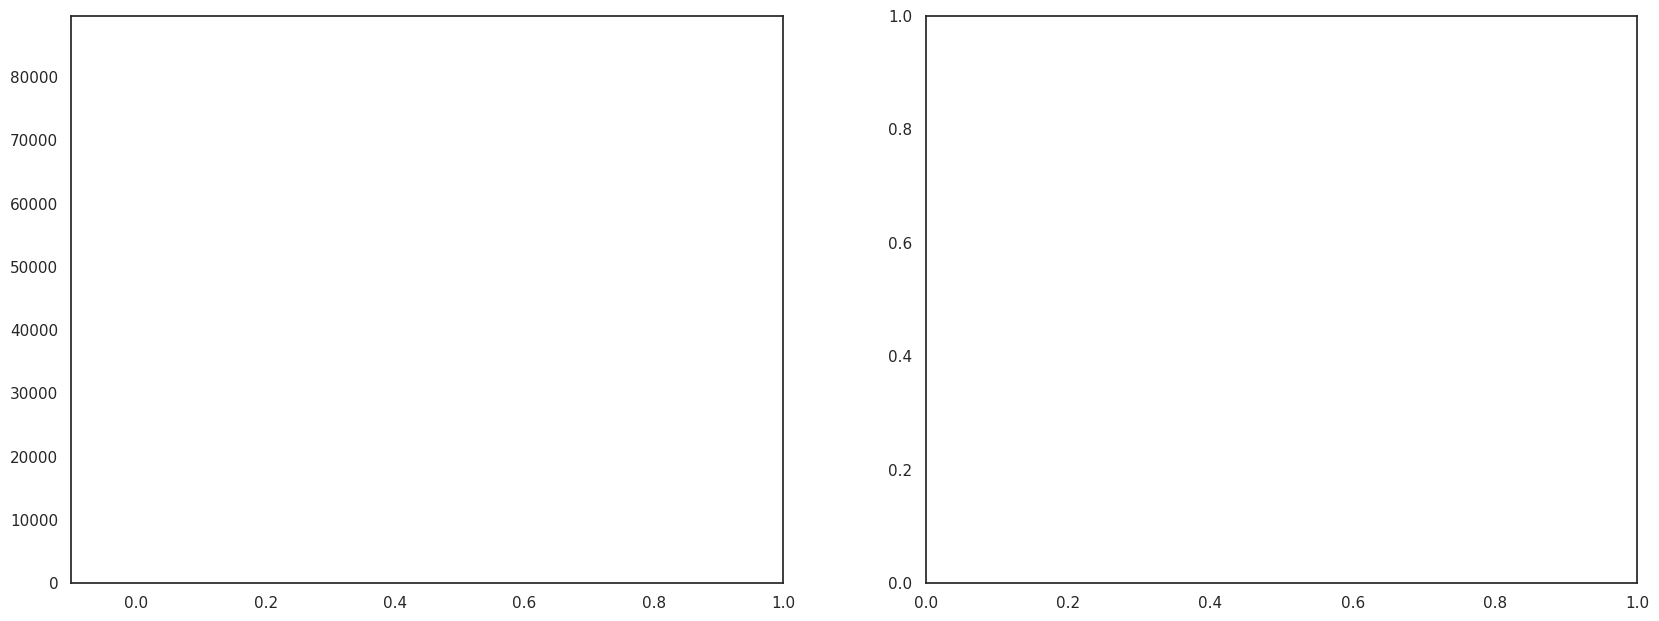

In [117]:
perform_rfm_analysis(RFM_log_trans_wo_scaled)

In [ ]:


# Specify the range of k values to test
k_values = range(1, 11)

# Call the elbow_method function
elbow_method(RFM_log_trans_wo_scaled, k_values)

# **MEDCOUPLE**

In [253]:
RFM_medcuple=selected_columns_rfm.copy()
RFM_medcuple


,Recency,Frequency,Monetary
0,111,1,141.90
1,114,1,27.19
2,536,1,86.22
3,320,1,43.62
4,287,1,196.89
...,...,...,...
91454,446,2,4134.84
91455,261,1,84.58
91456,567,1,112.46
91457,118,1,133.69


In [258]:
class Med_couple:
    
    def __init__(self,data):
        self.data = np.sort(data,axis = None)[::-1] # sorted decreasing  
        self.med = np.median(self.data)
        self.scale = 2*np.amax(np.absolute(self.data))
        self.Zplus = [(x-self.med)/self.scale for x in self.data if x>=self.med]
        self.Zminus = [(x-self.med)/self.scale for x in self.data if x<=self.med]
        self.p = len(self.Zplus)
        self.q = len(self.Zminus)
    
    def H(self,i,j):
        a = self.Zplus[i]
        b = self.Zminus[j]

        if a==b:
            return np.sign(self.p - 1 - i - j)
        else:
            return (a+b)/(a-b)

    def greater_h(self,u):

        P = [0]*self.p

        j = 0

        for i in range(self.p-1,-1,-1):
            while j < self.q and self.H(i,j)>u:
                j+=1
            P[i]=j-1
        return P

    def less_h(self,u):

        Q = [0]*self.p

        j = self.q - 1

        for i in range(self.p):
            while j>=0 and self.H(i,j) < u:
                j=j-1
            Q[i]=j+1
        
        return Q
    #Kth pair algorithm (Johnson & Mizoguchi)
    def kth_pair_algorithm(self):
        L = [0]*self.p
        R = [self.q-1]*self.p

        Ltotal = 0

        Rtotal = self.p*self.q

        medcouple_index = math.floor(Rtotal / 2)

        while Rtotal - Ltotal > self.p:

            middle_idx = [i for i in range(self.p) if L[i]<=R[i]]
            row_medians = [self.H(i,math.floor((L[i]+R[i])/2)) for i in middle_idx]

            weight = [R[i]-L[i] + 1 for i in middle_idx]

            WM = ws.weighted_median(row_medians,weights = weight)
            
            P = self.greater_h(WM)

            Q = self.less_h(WM)

            Ptotal = np.sum(P)+len(P) 
            Qtotal = np.sum(Q)

            if medcouple_index <= Ptotal-1:
                R = P
                Rtotal = Ptotal
            else:
                if medcouple_index > Qtotal - 1:
                    L = Q
                    Ltotal = Qtotal
                else:
                    return WM
        remaining = np.array([])
       
        for i in range(self.p):
            for j in range(L[i],R[i]+1):
                remaining = np.append(remaining,self.H(i,j))

        find_index = medcouple_index-Ltotal

        k_minimum_element = remaining[np.argpartition(remaining,find_index)] # K-element algothrm  
    
        return k_minimum_element[find_index]


In [264]:
rfm_monetary = RFM_medcuple['Monetary']  # Replace rfm['monetary'] with your actual data
medcouple = Med_couple(rfm_monetary)
medcouple_statistic = medcouple.kth_pair_algorithm()
print("Medcouple statistic:", medcouple_statistic)

Medcouple statistic: 0.3783960958554884


In [262]:
import numpy as np
from collections import Counter


def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

# detect outliers from list of features
lof = ['Monetary']
# params dataset, number of outliers for rejection, list of features
Outliers_to_drop = detect_outliers(RFM_medcuple, 2, lof)
Outliers_to_drop

[]

[]

In [2]:
from statsmodels.stats.stattools import medcouple
def adjBoxplotStats(x,
                    coeff=1.5,
                    a=-4.,
                    b=3.):  #creates bounds for outlier detection
    """ Calculates an adjusted interquartile range of distribution and points outside this range
    can be identified as outliers.

    Calculation and default parameters describe in: An adjusted boxplot for skewed distrubtions, Vanderviere
    and Huber, COMPSTAT 2004 Symposium.

    :param x: array
    :param coeff: scalar
    :param a: scalar
    :param b: scalar
    :return: dict with keys:
        fence: list of upper and lower adjusted quartiles
        IQR: unadjusted interquartile range
        MC: skew of distribution using medcouple which is a robust skew measure.
    """
    x = np.array(x)
    MC = medcouple(x)
    [Q1, Q2, Q3] = np.percentile(x, [25, 50, 75])
    IQR = Q3 - Q1
    if (MC >= 0):
        fence = [
            Q1 - coeff * np.exp(a * MC) * IQR,
            Q3 + coeff * np.exp(b * MC) * IQR
        ]
    else:
        fence = [
            Q1 - coeff * np.exp(-b * MC) * IQR,
            Q3 + coeff * np.exp(-a * MC) * IQR
        ]
    return {'fence': fence, 'IQR': IQR, 'medcouple': MC}

In [3]:
adjBoxplotStats(RFM_medcuple['Monetary'],
                    coeff=1.5,
                    a=-4.,
                    b=3.)

NameError: ignored

In [256]:
monetary=RFM_medcuple['Monetary']
index_outlier = detection_outlier(2,RFM_medcuple)
print(index_outlier)

KeyboardInterrupt: ignored

<ipython-input-216-0d8ddc340599>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM_medcuple['Recency'])
<ipython-input-216-0d8ddc340599>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM_medcuple['Frequency'])
<ipython-input-216-0d8ddc340599>:4: 

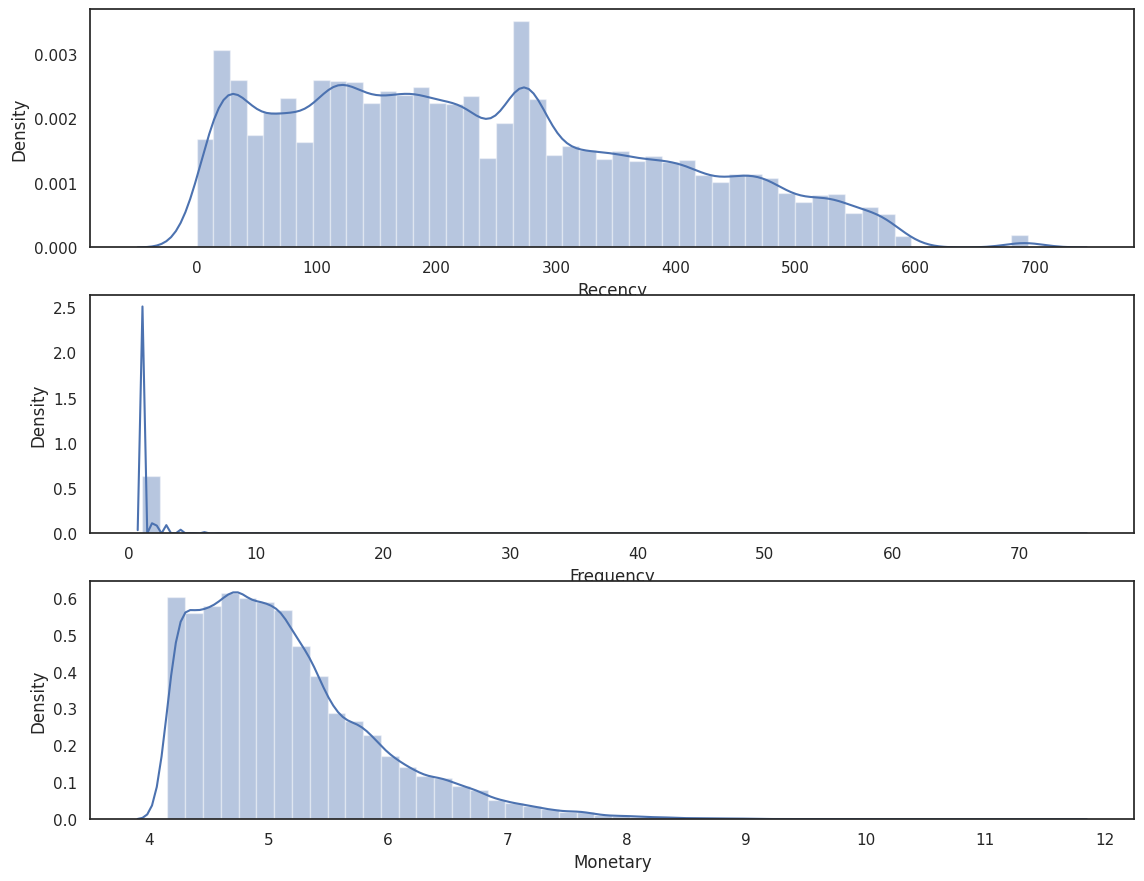

In [216]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_medcuple['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_medcuple['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_medcuple['Monetary'])
plt.show()





# BOX COX TRANSFORMATION

In [224]:
RFM_boxcox=selected_columns_rfm.copy()

In [225]:
#BOX COX TRANSFORMATION
import pandas as pd
import scipy.stats as stats

# Define the selected columns for transformation
selected_columns = [ 'Monetary']

RFM_boxcox=selected_columns_rfm.copy()

for column in selected_columns:
    RFM_boxcox[column], _ = stats.boxcox(RFM_boxcox[column])

# Print the transformed data
print(RFM_boxcox)

       Recency  Frequency  Monetary
0          111          1  2.828126
1          114          1  2.240925
2          536          1  2.676056
3          320          1  2.434570
4          287          1  2.918171
...        ...        ...       ...
91454      446          2  3.478569
91455      261          1  2.669803
91456      567          1  2.759528
91457      118          1  2.810925
91458      483          1  2.614076

[91459 rows x 3 columns]


In [226]:
for i in ["Monetary"]:
    num_outlier(RFM_boxcox, i)
    print("*"*40)

Number of outliers in Monetary column:  418
Indexes:  Int64Index([  254,   277,   411,   569,   601,   607,   671,   696,   739,
             1081,
            ...
            90047, 90153, 90292, 90748, 90807, 90837, 91192, 91380, 91448,
            91454],
           dtype='int64', length=418)
****************************************


In [227]:
for i in ["Monetary"]:
    RFM_boxcox_wo=erase_outliers(RFM_boxcox, i)
    print("*"*40)

Number of outliers in Monetary column: 418
Indexes: Int64Index([  254,   277,   411,   569,   601,   607,   671,   696,   739,
             1081,
            ...
            90047, 90153, 90292, 90748, 90807, 90837, 91192, 91380, 91448,
            91454],
           dtype='int64', length=418)
****************************************


In [228]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(RFM_boxcox_wo[['Recency', 'Frequency', 'Monetary']])

# Create a new DataFrame with scaled columns
RFM_boxcox_wo_scaled = pd.DataFrame(X_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])
RFM_boxcox_wo_scaled

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,-0.820449,-0.286338,0.294364
1,-0.800782,-0.286338,-1.986058
2,1.965768,-0.286338,-0.296208
3,0.549714,-0.286338,-1.234031
4,0.333372,-0.286338,0.644059
...,...,...,...
91036,0.117031,-0.286338,-0.507754
91037,0.162921,-0.286338,-0.320491
91038,2.168997,-0.286338,0.027960
91039,-0.774559,-0.286338,0.227564


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.27155657637769537


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.33084641762837397


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3295600369547931


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.30249117834373607


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.30917181593465237


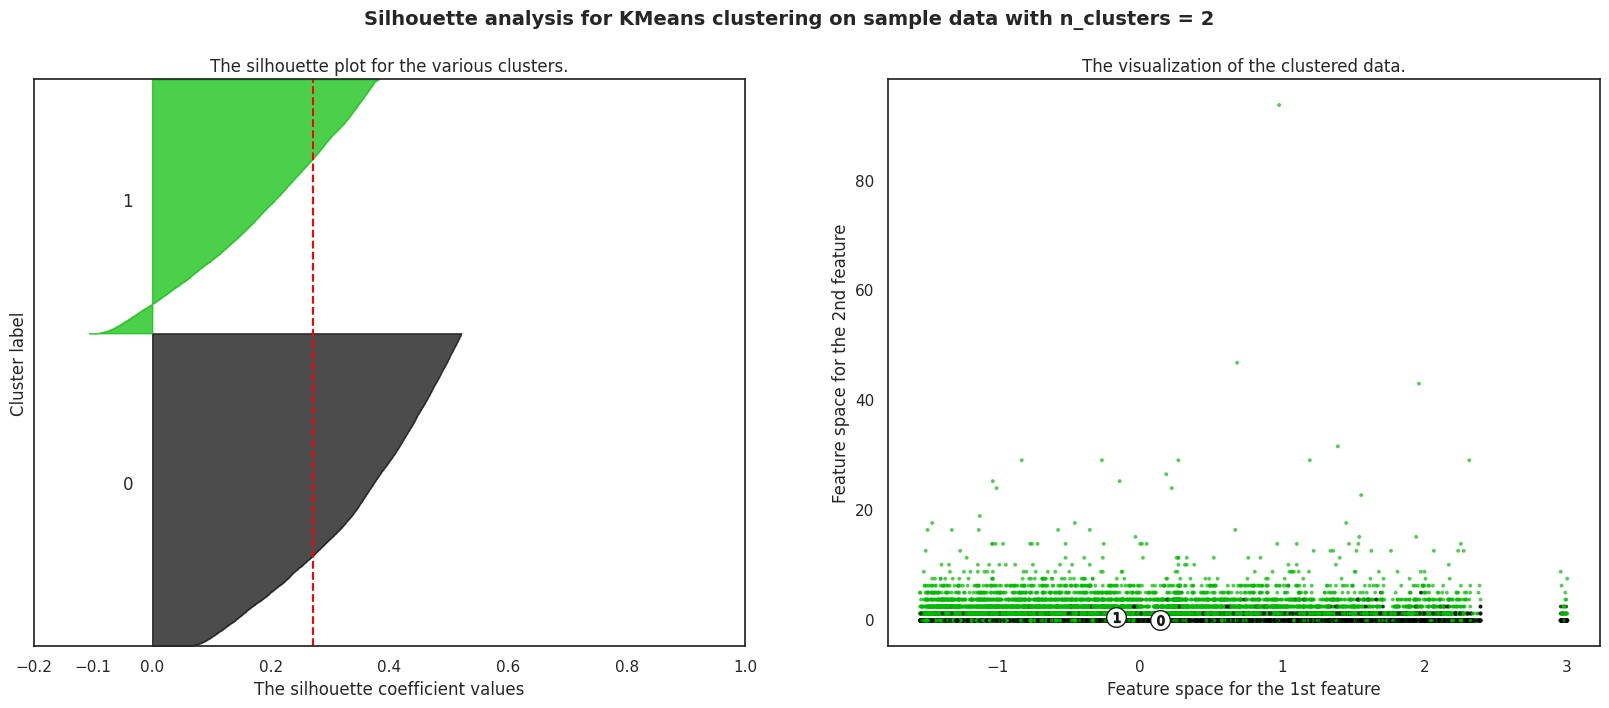

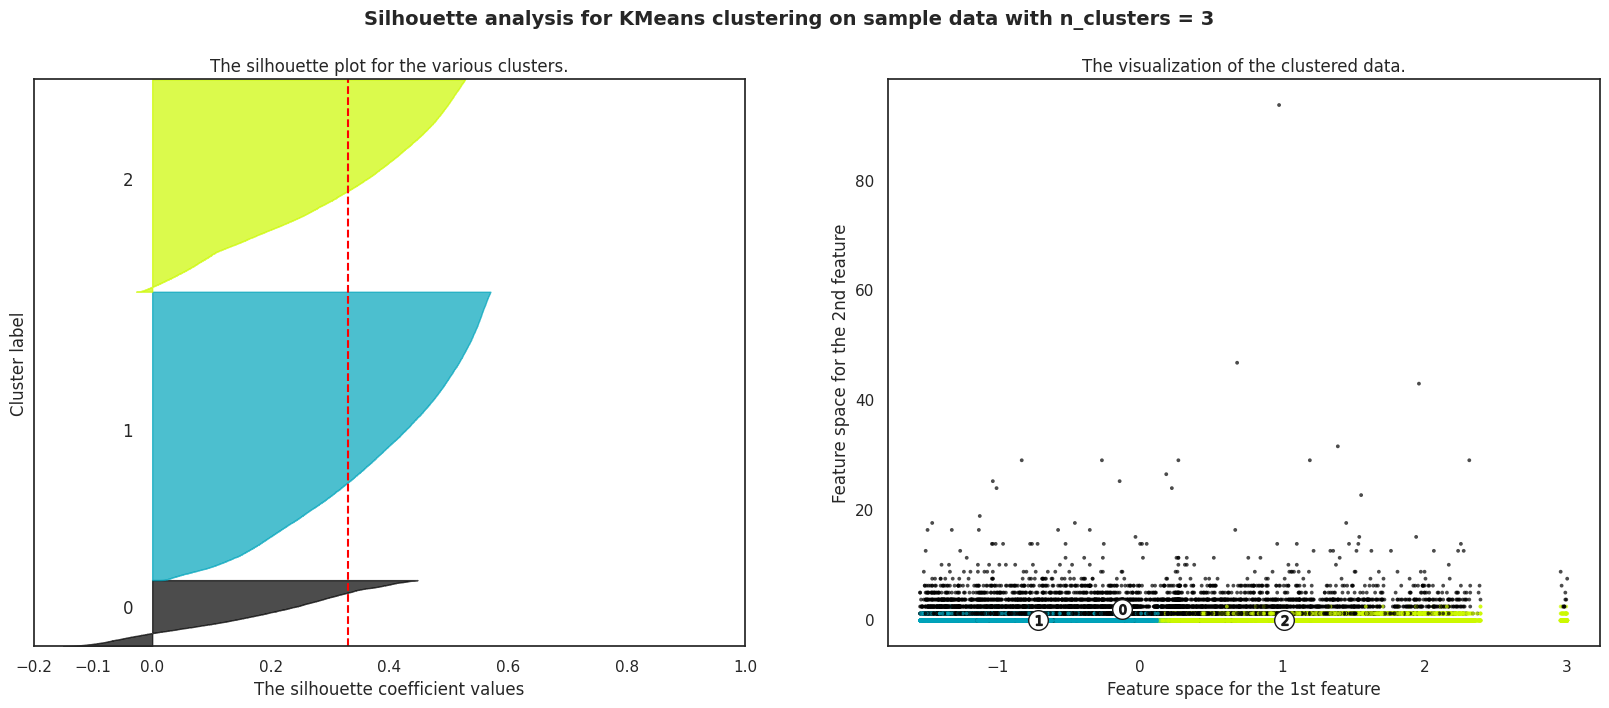

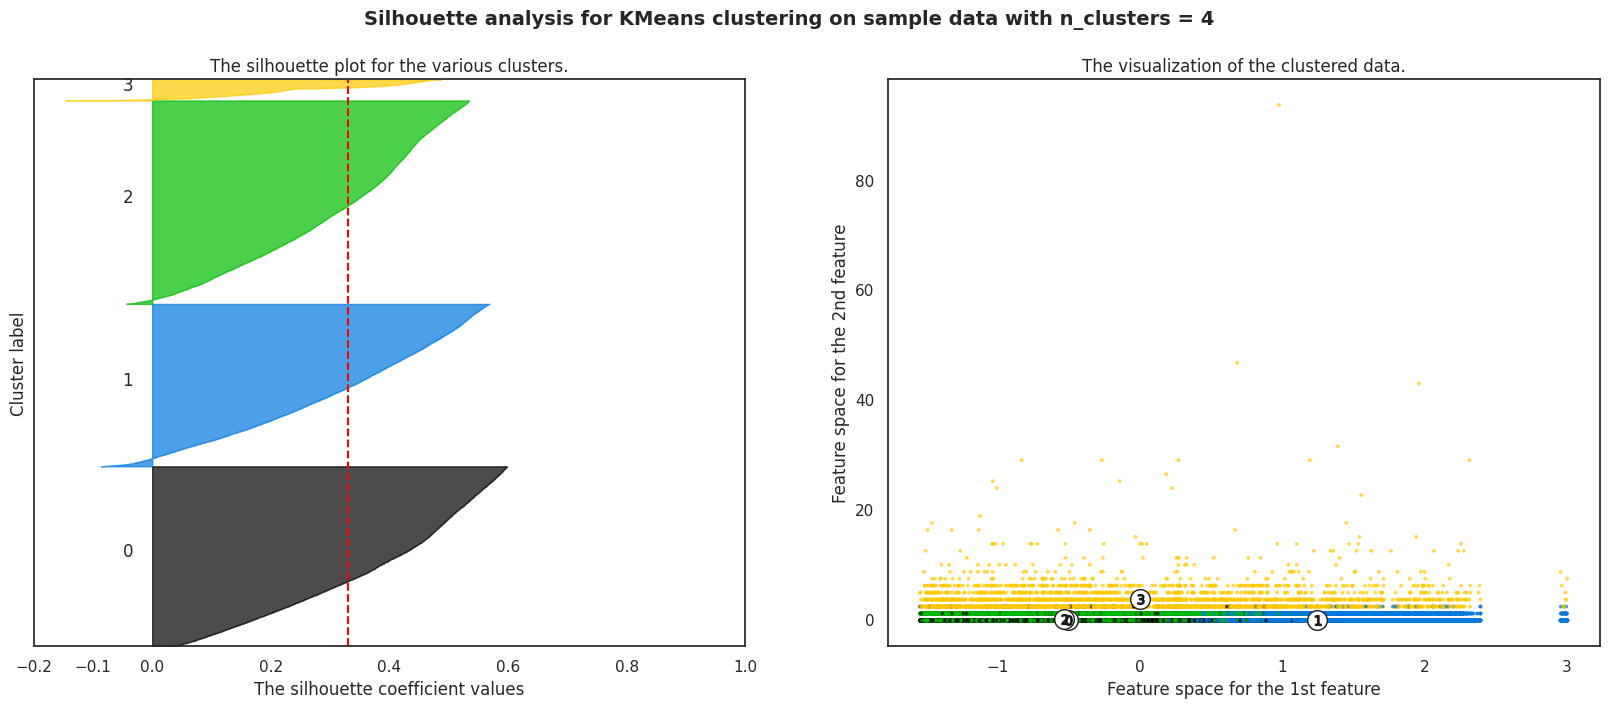

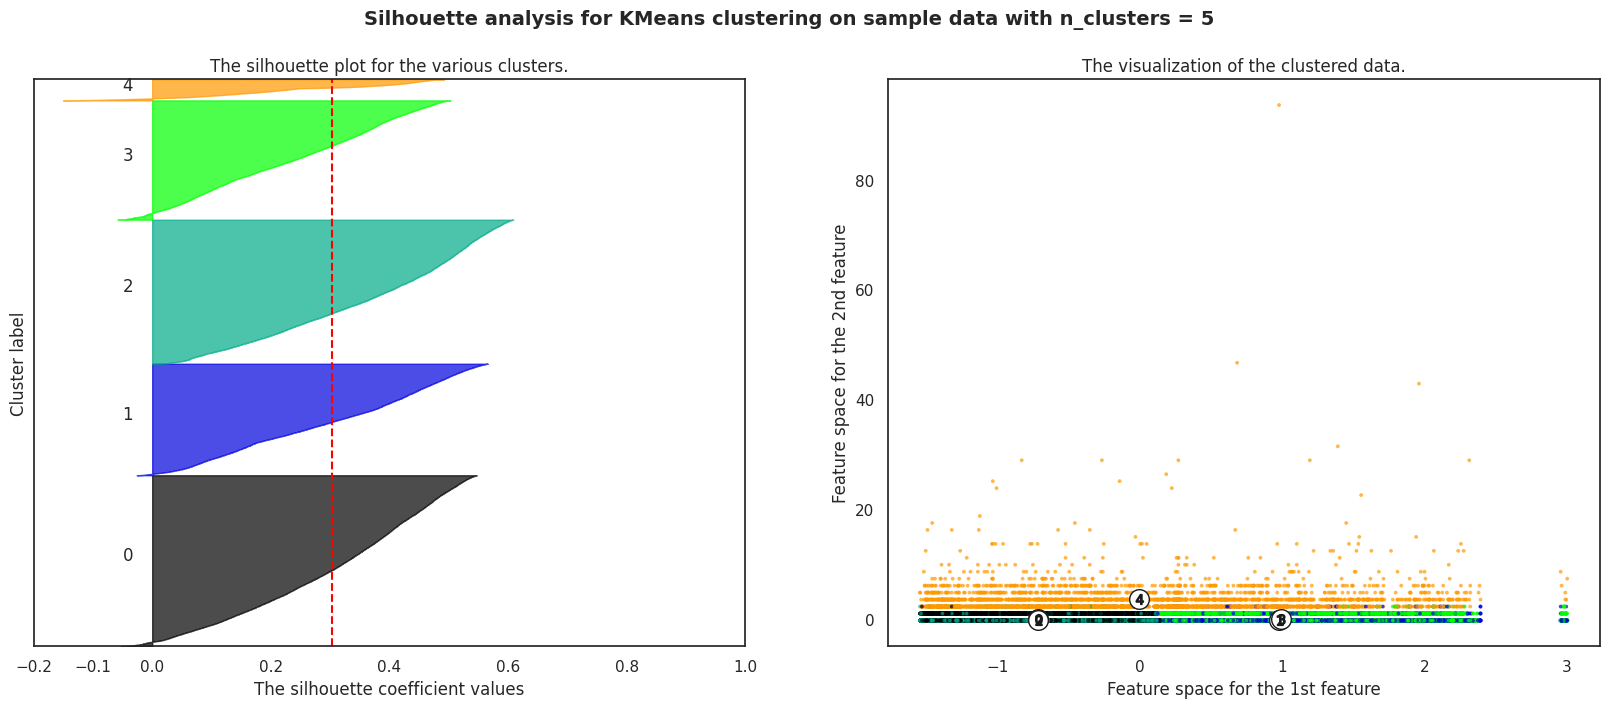

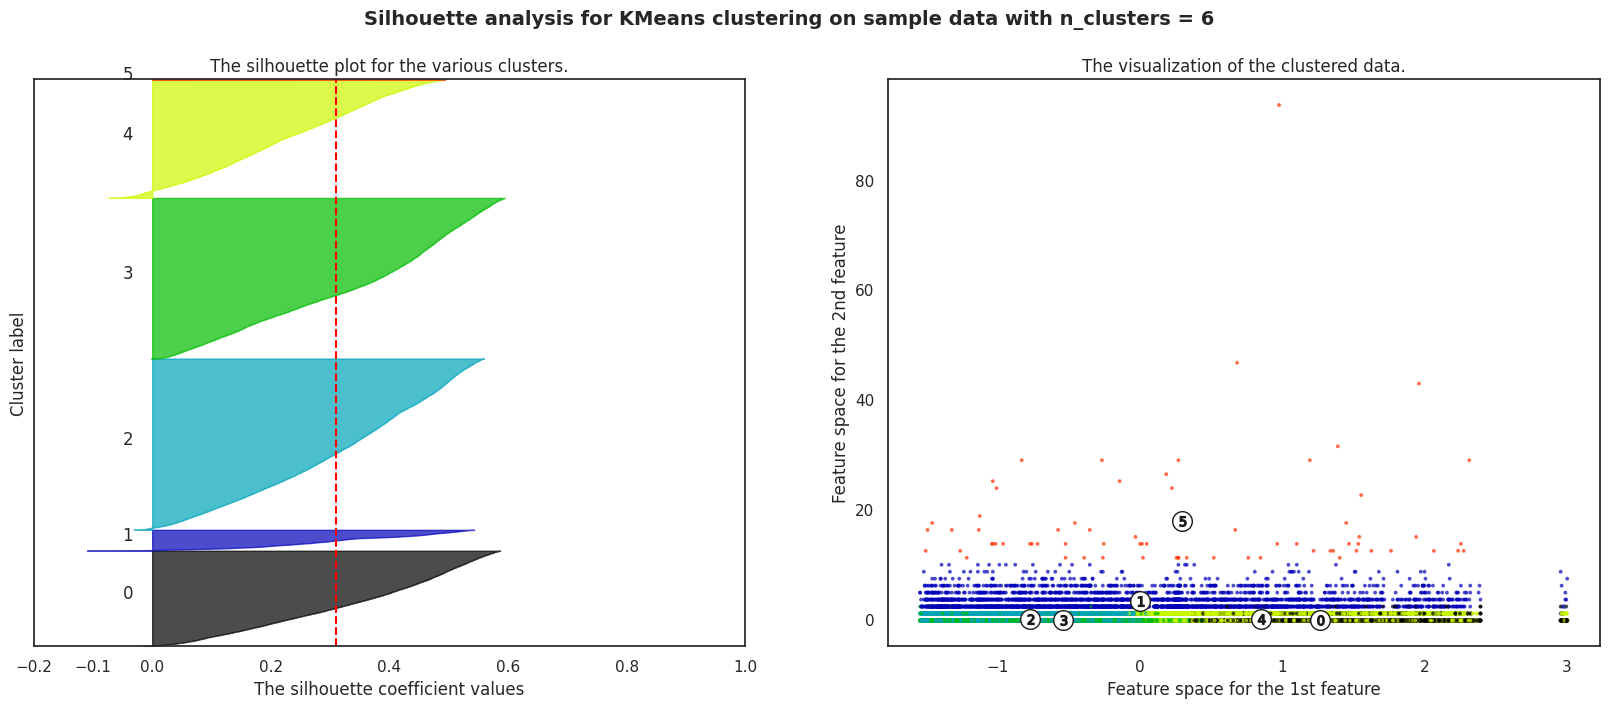

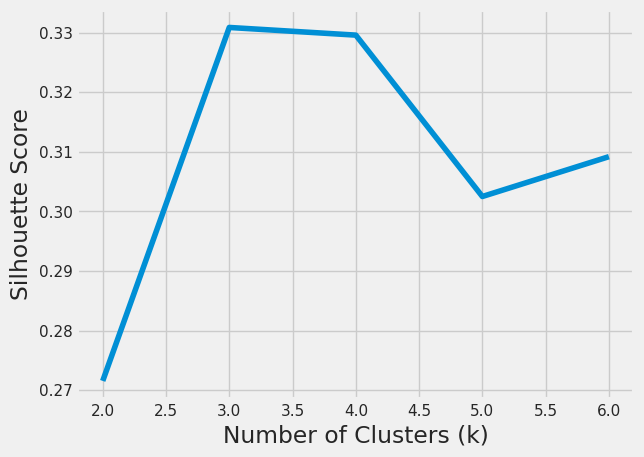

In [229]:
perform_rfm_analysis(RFM_boxcox_wo_scaled)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming you have a DataFrame named 'olist' with the column 'product_category'
# and another DataFrame named 'RFM_df' containing the RFM variables

# Convert the 'product_category' column to a string type
olist['product_category'] = olist['product_category'].astype(str)

# Merge 'RFM_df' with 'olist' based on a common identifier, for example, a customer ID
merged_df = pd.merge(olist, RFM_df, on='customer_id', how='inner')

# Create a basket for Apriori algorithm by grouping the data based on 'product_category' and RFM variables
basket = merged_df.groupby(['product_category', 'Recency', 'Frequency', 'MonetaryValue']).size().unstack().reset_index().fillna(0).set_index('product_category')

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Print the frequent itemsets
print(frequent_itemsets)

# Print the association rules
print(rules)
